# Spam-Ham Classifier

- Using a simple Bag of Words (BoW) sms classifier using PyTorch. 

- The classifier is trained on Ham-Spam dataset.<br>

https://www.kaggle.com/ishansoni/sms-spam-collection-dataset

# 1)- Import key modules

In [0]:
from pathlib import Path

import pandas as pd
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from google_drive_downloader import GoogleDriveDownloader as gdd
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm, tqdm_notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# 2)- Loading data

https://www.kaggle.com/ishansoni/sms-spam-collection-dataset

In [0]:
DATA_PATH = 'SMSSpamCollection.csv'

In [4]:
# View some example records
df=pd.read_csv(DATA_PATH,delimiter='\t', quoting=3,names=['label','sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5574, 2)

In [0]:
df['label'] = pd.get_dummies(df.label, prefix='label').iloc[:,1:]

In [7]:
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.to_csv('sms.csv', index=False)

In [0]:
DATA_PATH='sms.csv'

In [10]:
pd.read_csv(DATA_PATH).head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
class Sequences(Dataset):
    def __init__(self, path):
        df = pd.read_csv(path)
        self.vectorizer = CountVectorizer(stop_words='english', max_df=0.99, min_df=0.005)
        self.sequences = self.vectorizer.fit_transform(df.sms.tolist())
        self.labels = df.label.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
    def __getitem__(self, i):
        return self.sequences[i, :].toarray(), self.labels[i]
    
    def __len__(self):
        return self.sequences.shape[0]

In [0]:
dataset = Sequences(DATA_PATH)
train_loader = DataLoader(dataset, batch_size=4096)

In [13]:
print(dataset[5][0].shape)

(1, 288)


# 3)- Bag-of-Words Representation


So the final bag-of-words vector for `['the', 'gray', 'cat', 'sat', 'on', 'the', 'gray', 'mat']` is `[0, 1, 1, 2, 2, 1, 0, 1]`.

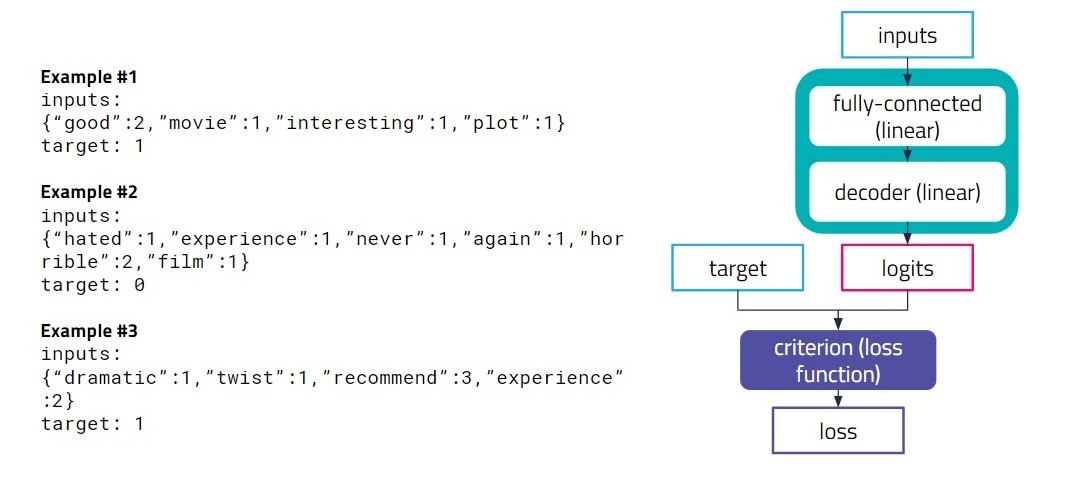

In [14]:
from IPython.display import Image
Image("bagofwords.jpg")

In [0]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.99, min_df=0.005)

In [0]:
sequences = vectorizer.fit_transform(df.sms.tolist())

In [17]:
print(pd.DataFrame(sequences).head(2))

                                                   0
0    (0, 95)\t1\n  (0, 279)\t1\n  (0, 94)\t1\n  (...
1                         (0, 175)\t1\n  (0, 124)\t1


In [0]:
labels = df.label.tolist()

In [19]:
labels[:5]

[0, 0, 1, 0, 0]

In [0]:
token2idx = vectorizer.vocabulary_

In [21]:
type(token2idx)

dict

In [22]:
print(len(token2idx))

288


In [23]:
token2idx

{'10': 0,
 '100': 1,
 '1000': 2,
 '150p': 3,
 '150ppm': 4,
 '16': 5,
 '18': 6,
 '1st': 7,
 '2nd': 8,
 '50': 9,
 '500': 10,
 'account': 11,
 'actually': 12,
 'afternoon': 13,
 'ah': 14,
 'aight': 15,
 'amp': 16,
 'apply': 17,
 'ask': 18,
 'asked': 19,
 'awarded': 20,
 'babe': 21,
 'baby': 22,
 'bad': 23,
 'bed': 24,
 'best': 25,
 'better': 26,
 'big': 27,
 'birthday': 28,
 'bit': 29,
 'box': 30,
 'bt': 31,
 'bus': 32,
 'buy': 33,
 'called': 34,
 'calls': 35,
 'camera': 36,
 'car': 37,
 'care': 38,
 'cash': 39,
 'chance': 40,
 'chat': 41,
 'check': 42,
 'claim': 43,
 'class': 44,
 'code': 45,
 'collect': 46,
 'com': 47,
 'come': 48,
 'coming': 49,
 'contact': 50,
 'cool': 51,
 'cos': 52,
 'cost': 53,
 'cs': 54,
 'customer': 55,
 'da': 56,
 'dad': 57,
 'dat': 58,
 'day': 59,
 'days': 60,
 'dear': 61,
 'den': 62,
 'did': 63,
 'didn': 64,
 'didnt': 65,
 'dinner': 66,
 'does': 67,
 'doing': 68,
 'don': 69,
 'dont': 70,
 'draw': 71,
 'dun': 72,
 'dunno': 73,
 'early': 74,
 'easy': 75,
 'eat':

In [24]:
token2idx['want']

263

In [0]:
idx2token = {idx: token for token, idx in token2idx.items()}

In [26]:
type(idx2token)

dict

In [27]:
print(len(idx2token))

288


In [28]:
idx2token

{0: '10',
 1: '100',
 2: '1000',
 3: '150p',
 4: '150ppm',
 5: '16',
 6: '18',
 7: '1st',
 8: '2nd',
 9: '50',
 10: '500',
 11: 'account',
 12: 'actually',
 13: 'afternoon',
 14: 'ah',
 15: 'aight',
 16: 'amp',
 17: 'apply',
 18: 'ask',
 19: 'asked',
 20: 'awarded',
 21: 'babe',
 22: 'baby',
 23: 'bad',
 24: 'bed',
 25: 'best',
 26: 'better',
 27: 'big',
 28: 'birthday',
 29: 'bit',
 30: 'box',
 31: 'bt',
 32: 'bus',
 33: 'buy',
 34: 'called',
 35: 'calls',
 36: 'camera',
 37: 'car',
 38: 'care',
 39: 'cash',
 40: 'chance',
 41: 'chat',
 42: 'check',
 43: 'claim',
 44: 'class',
 45: 'code',
 46: 'collect',
 47: 'com',
 48: 'come',
 49: 'coming',
 50: 'contact',
 51: 'cool',
 52: 'cos',
 53: 'cost',
 54: 'cs',
 55: 'customer',
 56: 'da',
 57: 'dad',
 58: 'dat',
 59: 'day',
 60: 'days',
 61: 'dear',
 62: 'den',
 63: 'did',
 64: 'didn',
 65: 'didnt',
 66: 'dinner',
 67: 'does',
 68: 'doing',
 69: 'don',
 70: 'dont',
 71: 'draw',
 72: 'dun',
 73: 'dunno',
 74: 'early',
 75: 'easy',
 76: 'e

In [0]:
class Sequences(Dataset):
    def __init__(self, path):
        df = pd.read_csv(path)
        self.vectorizer = CountVectorizer(stop_words='english', max_df=0.99, min_df=0.005)
        self.sequences = self.vectorizer.fit_transform(df.sms.tolist())
        self.labels = df.label.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
    def __getitem__(self, i):
        return self.sequences[i, :].toarray(), self.labels[i]
    
    def __len__(self):
        return self.sequences.shape[0]

In [30]:
dataset = Sequences(DATA_PATH)
train_loader = DataLoader(dataset, batch_size=4096)

print(dataset[5][0].shape)

(1, 288)


# 4)-Model Building

Layer 1 affine: $$x_1 = W_1 X + b_1$$
Layer 1 activation: $$h_1 = \textrm{Relu}(x_1)$$
Layer 2 affine: $$x_2 = W_2 h_1 + b_2$$
output: $$p = \sigma(x_2)$$
Loss: $$L = −(ylog(p)+(1−y)log(1−p))$$
Gradient: 
$$\frac{\partial }{\partial W_1}L(W_1, b_1, W_2, b_2) = \frac{\partial L}{\partial p}\frac{\partial p}{\partial x_2}\frac{\partial x_2}{\partial h_1}\frac{\partial h_1}{\partial x_1}\frac{\partial x_1}{\partial W_1}$$

Parameter update:
$$W_1 = W_1 - \alpha \frac{\partial L}{\partial W_1}$$

In [0]:
class BagOfWordsClassifier(nn.Module):
    def __init__(self, vocab_size, hidden1, hidden2):
        super(BagOfWordsClassifier, self).__init__()
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
    
    def forward(self, inputs):
        x = F.relu(self.fc1(inputs.squeeze(1).float()))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [32]:
model = BagOfWordsClassifier(len(dataset.token2idx), 128, 64)
model

BagOfWordsClassifier(
  (fc1): Linear(in_features=288, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

**Binary crossentropy(BCEWithLogitsLoss)**

It's called Binary Cross-Entropy Loss because it sets up a binary classification problem between C′=2 classes for every class in C i.e Ham or Spam.

In [0]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=0.001) # Adam: Dynmaically change learning rate

In [34]:
model.train()
train_losses = []
for epoch in range(50):
    progress_bar = tqdm_notebook(train_loader, leave=False)
    losses = []
    total = 0
    for inputs, target in progress_bar:
        model.zero_grad()

        output = model(inputs)
        loss = criterion(output.squeeze(), target.float())
        
        loss.backward()
              
        nn.utils.clip_grad_norm_(model.parameters(), 3)

        optimizer.step()
        
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        
        losses.append(loss.item())
        total += 1
    
    epoch_loss = sum(losses) / total
    train_losses.append(epoch_loss)
        
    tqdm.write(f'Epoch #{epoch + 1}\tTrain Loss: {epoch_loss:.3f}')

Epoch #1	Train Loss: 0.734


Epoch #2	Train Loss: 0.720


Epoch #3	Train Loss: 0.706


Epoch #4	Train Loss: 0.690


Epoch #5	Train Loss: 0.673


Epoch #6	Train Loss: 0.653


Epoch #7	Train Loss: 0.631


Epoch #8	Train Loss: 0.604


Epoch #9	Train Loss: 0.574


Epoch #10	Train Loss: 0.541


Epoch #11	Train Loss: 0.505


Epoch #12	Train Loss: 0.467


Epoch #13	Train Loss: 0.429


Epoch #14	Train Loss: 0.392


Epoch #15	Train Loss: 0.357


Epoch #16	Train Loss: 0.324


Epoch #17	Train Loss: 0.295


Epoch #18	Train Loss: 0.270


Epoch #19	Train Loss: 0.247


Epoch #20	Train Loss: 0.228


Epoch #21	Train Loss: 0.211


Epoch #22	Train Loss: 0.197


Epoch #23	Train Loss: 0.184


Epoch #24	Train Loss: 0.172


Epoch #25	Train Loss: 0.161


Epoch #26	Train Loss: 0.152


Epoch #27	Train Loss: 0.142


Epoch #28	Train Loss: 0.134


Epoch #29	Train Loss: 0.125


Epoch #30	Train Loss: 0.118


Epoch #31	Train Loss: 0.111


Epoch #32	Train Loss: 0.104


Epoch #33	Train Loss: 0.098


Epoch #34	Train Loss: 0.092


Epoch #35	Train Loss: 0.087


Epoch #36	Train Loss: 0.082


Epoch #37	Train Loss: 0.078


Epoch #38	Train Loss: 0.074


Epoch #39	Train Loss: 0.070


Epoch #40	Train Loss: 0.066


Epoch #41	Train Loss: 0.063


Epoch #42	Train Loss: 0.061


Epoch #43	Train Loss: 0.058


Epoch #44	Train Loss: 0.056


Epoch #45	Train Loss: 0.053


Epoch #46	Train Loss: 0.052


Epoch #47	Train Loss: 0.050


Epoch #48	Train Loss: 0.048


Epoch #49	Train Loss: 0.046


Epoch #50	Train Loss: 0.045


# 5)- Predict Results

In [0]:
def predict_sms(text):
    model.eval()
    with torch.no_grad():
        test_vector = torch.LongTensor(dataset.vectorizer.transform([text]).toarray())

        output = model(test_vector)
        prediction = torch.sigmoid(output).item()

        if prediction > 0.5:
            print(f'{prediction:0.3}: Spam sms')
        else:
            print(f'{prediction:0.3}: Ham sms')

In [36]:
test_text = """
Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate.
"""
predict_sms(test_text)

0.99: Spam sms


**In this case, first we have sigmoid value (between 0 and 1).It will be higher i.e >.5 for Spam and less i.e <.5 for Ham. Then we have result of our prediction.**

In [37]:
test_text = """
Have you had a good day? Mine was really busy are you up to much tomorrow night?
"""
predict_sms(test_text)

0.000324: Ham sms


In [38]:
test_text = """
Ffffffffff. Alright no way I can meet up with you sooner?
"""
predict_sms(test_text)

0.00108: Ham sms


In [39]:
test_text = """
FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE access for 24 hrs then chrgd@50p per day txt Stop 2exit. This msg is free
"""
predict_sms(test_text)

0.993: Spam sms
